## Análisis y Visualizción - Mentoría - Review de productos en Amazon

### Ulises Dascalakis

Mail : ulises.dasca@live.com.ar

### Alejandro Bernal

Mail : alejandro@alejandro.bio

### Presentación: <a href="https://docs.google.com/presentation/d/186sn-p9yqiaRcpSIFJzCVnW95iy8sUpnP-z9yZA2LYk/edit?usp=sharing" target="_blank">Enlace a la presentación</a>


In [402]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [403]:
dataset = pd.read_csv('data_review.csv')

### Consistencia de los datos

In [404]:
### Listamos los nombres de las columnas
list(dataset.columns.values)

['rating', 'title', 'review', 'target']

In [405]:
### Describiendo los datos de la columna title
dataset['title'].describe()

count         99999
unique        87206
top       Excellent
freq            228
Name: title, dtype: object

In [406]:
### Describiendo los datos de rating
dataset['rating'].describe()

count    100000.000000
mean          3.975310
std           1.496717
min           1.000000
25%           3.000000
50%           5.000000
75%           5.000000
max           5.000000
Name: rating, dtype: float64

In [407]:
### Describiendo los datos de target
dataset['target'].describe()

count    93225.000000
mean         0.785036
std          0.410799
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: target, dtype: float64

In [408]:
### Evaluando si hay datos nulos
rating_is_null = dataset['rating'].isnull().values.any()
target_is_null = dataset['target'].isnull().values.any()
print('rating_is_null: ' + str(rating_is_null))
print('target_is_null: ' + str(target_is_null))

rating_is_null: False
target_is_null: True


In [409]:
#Contamos los valores nulos de target
target_null = list(dataset['target'].isnull()).count(True)
#Contamos los valores no nulos de target
target_not_null = list(dataset['target'].isnull()).count(False)
#Validamos si la cantidad de valores nulos y no nulos es lo mismo que el total de registros
target_null + target_not_null == dataset['target'].shape[0]

True

### Resultado del Análisis de los Datos

Analizamos el dataset y obtuvimos lo siguiente para cada campo:
* <b>title</b>: posee valores nulos, tenemos faltantes.
* <b>review</b>: no posee valores nulos.
* <b>rating</b>: no posee valores nulos. 
* <b>target</b>: tenemos faltantes, posee valores nulos.

<b>Conclusión</b>: No hay valores Nulos en Rating pero si en Target.

In [410]:
### Dimensionamos los valores null
cant_target_null = dataset['target'].isnull().sum()
print("Podemos observar que el " + 
      str((cant_target_null / dataset['target'].shape[0])* 100) + "% de los valores son nulos para Target")

Podemos observar que el 6.775% de los valores son nulos para Target


Para darle consistencia a los datos decidimos lo siguiente. En el caso del campo title, lo dejamos en blanco. 
Para los valores de rating menores o iguales a 3, le asignamos un target = 0.

In [411]:
dataset[dataset['rating']==3] = dataset[dataset['rating']==3].fillna(0)

### Cantidad de Reviews por Rating

Text(0.5, 1.0, 'Cantidad Por Rating')

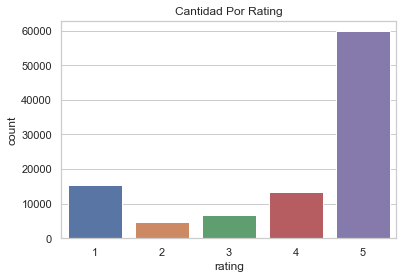

In [412]:
sns.countplot(data=dataset, x='rating').set_title('Cantidad Por Rating')

<b>Conclusión</b>: Podemos visualizar que la mayor cantidad de reviews tienen un Rating alto. Podemos decir que los usuarios que completan reviews tienden a responder de manera positiva.

### Distribución de los Ratings
¿Los ratings tienen una distribución conocida? ¿Cuál?

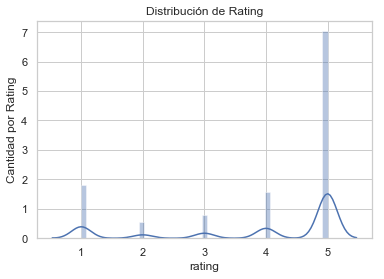

In [413]:
## Graficando distribución de los ratings
plt.title('Distribución de Rating')
plt.ylabel('Cantidad por Rating')
sns.distplot(dataset['rating'])

<b>Conclusión:</b> Cada valor de la columna rating tiene la misma probabilidad ya que puede tomar los valores preestablecidos del 1 al 5. Los valores fuera de este rango nunca ocurren entonces encontramos una <b>distribución de probabilidad uniforme.</b>

### Target vs Rating

Analizamos la relación entre los valores de Rating y Target

Text(0.5, 1.0, 'Target vs Rating')

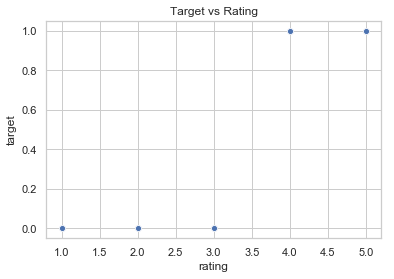

In [414]:
sns.scatterplot(x="rating", y="target", data=dataset).set_title("Target vs Rating")

<b>Conclusión</b>: Podemos visualizar que target 1 se da en valores de rating mayores a 3 y para los rating menores de 3 se da un valor de target 0. En conclusión todos los ratings con valores mayores a 3, son de target positivo.

### Buscando Outliers
¿El datset presenta algún outlier?

Text(0.5, 1.0, 'Rating Boxplot')

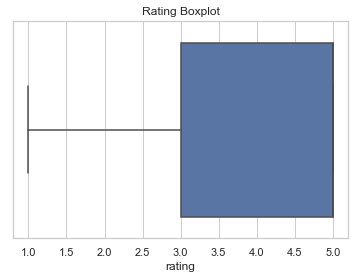

In [415]:
sns.set(style="whitegrid")
sns.boxplot(x=dataset["rating"]).set_title("Rating Boxplot")

Text(0.5, 1.0, 'Target Boxplot')

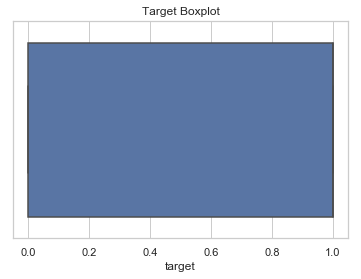

In [416]:
sns.set(style="whitegrid")
sns.boxplot(x=dataset["target"]).set_title("Target Boxplot")

<b>Conclusión</b>: El dataset no presenta outliers, las variables target y rating son variables categóricas y pueden contener valores acotados 1 o 0 para target y entre 1 y 5 para rating. Representamos estos atributos en un boxplot para visualizar la inexistencia de outliers. 
